In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Read in data
data = pd.read_csv('Resources/wildfires_ml5.csv')
data.head()

,CAUSE,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK,OWNER
0,4,2005,40.036944,-121.005833,4,0.10,0.0,2,2,3
1,1,2004,38.933056,-120.404444,4,0.25,0.0,5,2,3
2,2,2004,38.984167,-120.735556,4,0.10,0.0,5,0,5
3,1,2004,38.559167,-119.913333,4,0.10,5.0,6,0,3
4,1,2004,38.559167,-119.933056,4,0.10,5.0,6,0,3


In [3]:
def set_nat(cat):
    nature = 0
    if cat == 1:
        nature = 1
    else:
        nature = 0
    return nature

data['NATURE'] = data['CAUSE'].apply(lambda x: set_nat(x))
data.head()

,CAUSE,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK,OWNER,NATURE
0,4,2005,40.036944,-121.005833,4,0.10,0.0,2,2,3,0
1,1,2004,38.933056,-120.404444,4,0.25,0.0,5,2,3,1
2,2,2004,38.984167,-120.735556,4,0.10,0.0,5,0,5,0
3,1,2004,38.559167,-119.913333,4,0.10,5.0,6,0,3,1
4,1,2004,38.559167,-119.933056,4,0.10,5.0,6,0,3,1


In [4]:
def set_acc(cat):
    accident = 0
    if cat == 2:
        accident = 1
    else:
        accident = 0
    return accident

data['ACCIDENT'] = data['CAUSE'].apply(lambda x: set_acc(x))
data.head()

,CAUSE,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK,OWNER,NATURE,ACCIDENT
0,4,2005,40.036944,-121.005833,4,0.10,0.0,2,2,3,0,0
1,1,2004,38.933056,-120.404444,4,0.25,0.0,5,2,3,1,0
2,2,2004,38.984167,-120.735556,4,0.10,0.0,5,0,5,0,1
3,1,2004,38.559167,-119.913333,4,0.10,5.0,6,0,3,1,0
4,1,2004,38.559167,-119.933056,4,0.10,5.0,6,0,3,1,0


In [5]:
def set_int(cat):
    intent = 0
    if cat == 3:
        intent = 1
    else:
        intent = 0
    return intent

data['INTENT'] = data['CAUSE'].apply(lambda x: set_int(x))
data.head()

,CAUSE,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK,OWNER,NATURE,ACCIDENT,INTENT
0,4,2005,40.036944,-121.005833,4,0.10,0.0,2,2,3,0,0,0
1,1,2004,38.933056,-120.404444,4,0.25,0.0,5,2,3,1,0,0
2,2,2004,38.984167,-120.735556,4,0.10,0.0,5,0,5,0,1,0
3,1,2004,38.559167,-119.913333,4,0.10,5.0,6,0,3,1,0,0
4,1,2004,38.559167,-119.933056,4,0.10,5.0,6,0,3,1,0,0


In [6]:
#Set independent variables
X = data.iloc[:,1:10]
X.head()

,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DURATION,MONTH,DAY_OF_WEEK,OWNER
0,2005,40.036944,-121.005833,4,0.10,0.0,2,2,3
1,2004,38.933056,-120.404444,4,0.25,0.0,5,2,3
2,2004,38.984167,-120.735556,4,0.10,0.0,5,0,5
3,2004,38.559167,-119.913333,4,0.10,5.0,6,0,3
4,2004,38.559167,-119.933056,4,0.10,5.0,6,0,3


In [7]:
#MODEL TO CLASSIFY NATURE (LIGHTNING)
y = data.iloc[:,10]

In [8]:
y

0         0
1         1
2         0
3         1
4         1
         ..
988929    0
988930    0
988931    1
988932    0
988933    0
Name: NATURE, Length: 988934, dtype: int64

In [9]:
print(X.shape, y.shape)

(988934, 9) (988934,)


In [10]:
#Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf = clf_rf.fit(X_train_scaled, y_train)
print(clf_rf.score(X_test_scaled,y_test))

0.9275059255604002


In [13]:
importance_data = sorted(list(zip(X.columns,clf_rf.feature_importances_)), key=lambda tpl:tpl[1], reverse=True)

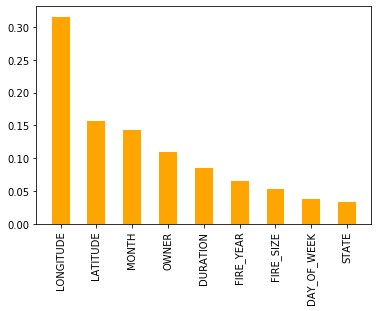

In [14]:
xs = range(len(importance_data))
labels = [x for (x,_) in importance_data]
ys = [y for (_,y) in importance_data]

plt.bar(xs, ys, width=0.5, color="orange")
plt.xticks(xs, labels, rotation=90)
plt.show()

In [15]:
importance_data

[('LONGITUDE', 0.3157855680230099),
 ('LATITUDE', 0.15700921353882674),
 ('MONTH', 0.14318483479622515),
 ('OWNER', 0.10997171716744311),
 ('DURATION', 0.08471097760963259),
 ('FIRE_YEAR', 0.06586972541353915),
 ('FIRE_SIZE', 0.053369111604914005),
 ('DAY_OF_WEEK', 0.03707540741549929),
 ('STATE', 0.03302344443091006)]

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = clf_rf.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[182834   7583]
 [ 10340  46477]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95    190417
           1       0.86      0.82      0.84     56817

    accuracy                           0.93    247234
   macro avg       0.90      0.89      0.90    247234
weighted avg       0.93      0.93      0.93    247234



In [17]:
import itertools

In [18]:
matrix = confusion_matrix(y_test, predictions)

In [19]:
class_names = ['Other', 'Nature']

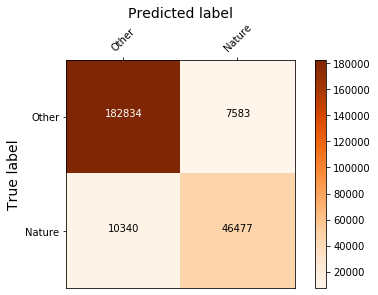

In [20]:
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Oranges)

# plot colorbar to the right
plt.colorbar()
    
fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")
    
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

In [21]:
from sklearn.metrics import plot_roc_curve

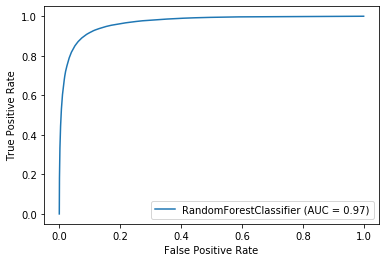

In [22]:
rfc_disp = plot_roc_curve(clf_rf, X_test_scaled, y_test)

In [23]:
#MODEL TO CLASSIFY ACCIDENTAL (MAN-MADE)
y = data.iloc[:,11]

In [24]:
y

0         0
1         0
2         1
3         0
4         0
         ..
988929    0
988930    0
988931    0
988932    0
988933    0
Name: ACCIDENT, Length: 988934, dtype: int64

In [25]:
#Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf = clf_rf.fit(X_train_scaled, y_train)
print(clf_rf.score(X_test_scaled,y_test))

0.7850821488953784


In [28]:
importance_data = sorted(list(zip(X.columns,clf_rf.feature_importances_)), key=lambda tpl:tpl[1], reverse=True)

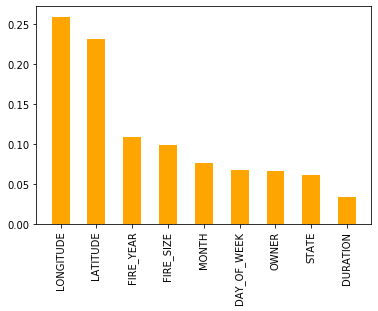

In [29]:
xs = range(len(importance_data))
labels = [x for (x,_) in importance_data]
ys = [y for (_,y) in importance_data]

plt.bar(xs, ys, width=0.5, color="orange")
plt.xticks(xs, labels, rotation=90)
plt.show()

In [30]:
importance_data

[('LONGITUDE', 0.25877147838923287),
 ('LATITUDE', 0.23110222459348517),
 ('FIRE_YEAR', 0.10846203918680537),
 ('FIRE_SIZE', 0.09801704643237086),
 ('MONTH', 0.07627387304774973),
 ('DAY_OF_WEEK', 0.06777331004909394),
 ('OWNER', 0.06580066454454953),
 ('STATE', 0.06045960128087637),
 ('DURATION', 0.03333976247583626)]

In [31]:
predictions = clf_rf.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[128237  24061]
 [ 29074  65862]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83    152298
           1       0.73      0.69      0.71     94936

    accuracy                           0.79    247234
   macro avg       0.77      0.77      0.77    247234
weighted avg       0.78      0.79      0.78    247234



In [32]:
matrix = confusion_matrix(y_test, predictions)

In [33]:
class_names = ['Other', 'Accident']

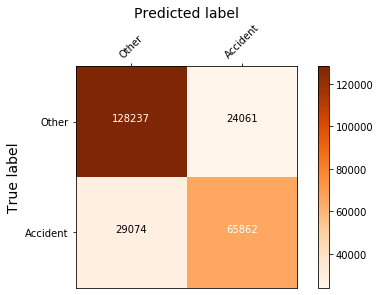

In [34]:
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Oranges)

# plot colorbar to the right
plt.colorbar()
    
fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")
    
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

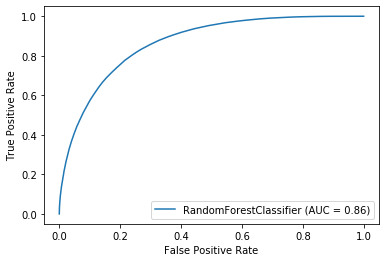

In [35]:
rfc_disp = plot_roc_curve(clf_rf, X_test_scaled, y_test)

In [36]:
#MODEL TO CLASSIFY INTENTIONAL (ARSON)
y = data.iloc[:,12]

In [37]:
y

0         0
1         0
2         0
3         0
4         0
         ..
988929    0
988930    1
988931    0
988932    0
988933    0
Name: INTENT, Length: 988934, dtype: int64

In [38]:
#Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf = clf_rf.fit(X_train_scaled, y_train)
print(clf_rf.score(X_test_scaled,y_test))

0.896668742972245


In [41]:
importance_data = sorted(list(zip(X.columns,clf_rf.feature_importances_)), key=lambda tpl:tpl[1], reverse=True)

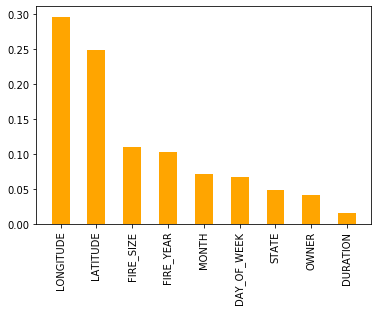

In [42]:
xs = range(len(importance_data))
labels = [x for (x,_) in importance_data]
ys = [y for (_,y) in importance_data]

plt.bar(xs, ys, width=0.5, color="orange")
plt.xticks(xs, labels, rotation=90)
plt.show()

In [43]:
importance_data

[('LONGITUDE', 0.2964916684818295),
 ('LATITUDE', 0.24932419604255313),
 ('FIRE_SIZE', 0.10974694097204982),
 ('FIRE_YEAR', 0.10208563704978149),
 ('MONTH', 0.07141142269972567),
 ('DAY_OF_WEEK', 0.06697376826405119),
 ('STATE', 0.04848358654101024),
 ('OWNER', 0.04053701277253875),
 ('DURATION', 0.014945767176460232)]

In [44]:
predictions = clf_rf.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[204267   6467]
 [ 19080  17420]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    210734
           1       0.73      0.48      0.58     36500

    accuracy                           0.90    247234
   macro avg       0.82      0.72      0.76    247234
weighted avg       0.89      0.90      0.89    247234



In [45]:
matrix = confusion_matrix(y_test, predictions)

In [46]:
class_names = ['Other', 'Intentional']

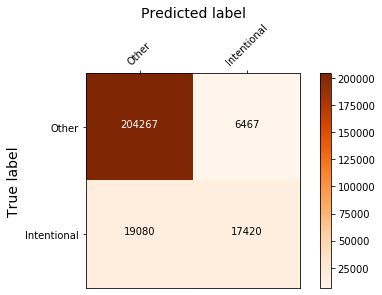

In [47]:
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Oranges)

# plot colorbar to the right
plt.colorbar()
    
fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")
    
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()

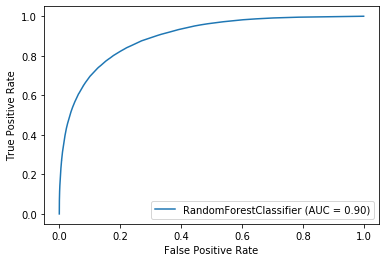

In [48]:
rfc_disp = plot_roc_curve(clf_rf, X_test_scaled, y_test)